In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import legume 
legume.set_backend('autograd')
import legume.backend as bd
import numpy as np
import autograd.numpy as npa
from autograd import grad
import time
import matplotlib.pyplot as plt
import optomization

In [184]:
a = 455
phc = optomization.W1(NyChange=0,Ny=7,eps_slab=3.13,dslab=270/a)
gme = legume.GuidedModeExp(phc,3.01)
ks = npa.linspace(np.pi*.5,np.pi,100)
gmeParams = {'verbose':False,'numeig':21,'compute_im':False,'kpoints':npa.array([ks,[0]*len(ks)])}
gme.run(**gmeParams)

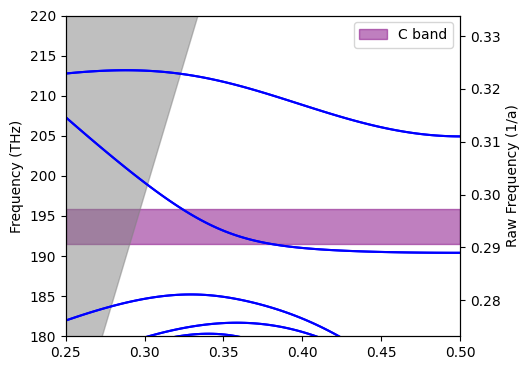

In [185]:
fconv = 299792458/a/1e-9/1e12
c_band_max = 195.9
c_band_min = 191.56

fig, ax1 = plt.subplots(figsize=(5.4, 3.8))

# Plot with frequency conversion on the left axis
ax1.plot(ks/np.pi/2, gme.freqs*fconv, color='b')
ax1.fill_between(ks/np.pi/2, c_band_min, c_band_max, color='purple', alpha=.5,label='C band')
ax1.fill_between(ks/np.pi/2, ks*fconv/np.pi/2, np.max(ks)*fconv/np.pi/2, color='gray', alpha=.5)
ax1.set_ylim(180, 220)
ax1.set_xlim(0.25, 0.5)
ax1.set_ylabel('Frequency (THz)')

# Create a second y-axis without frequency conversion
ax2 = ax1.twinx()
ax2.plot(ks/np.pi/2, gme.freqs, color='b')
ax2.set_ylabel('Raw Frequency (1/a)')
# Match x-limits
ax2.set_ylim(ax1.get_ylim()[0]/fconv, ax1.get_ylim()[1]/fconv)
ax1.legend()
fig.tight_layout()
plt.show()

In [186]:
ngs = []
for i in range(len(ks)):
    ngs.append(np.abs(optomization.NG(gme,i,14,Nx=100,Ny=125)))

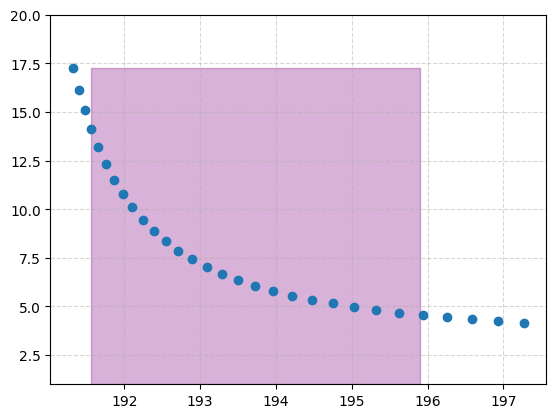

In [195]:
coff = 55
start = 25
plt.plot(gme.freqs[start:coff,14]*fconv,ngs[start:coff],'o')
plt.fill_between(np.linspace(c_band_min,c_band_max,coff), np.ones(coff), np.max(ngs[start:coff]), color='purple', alpha=0.3)
plt.grid(True,linestyle='--',alpha=0.5)
plt.ylim(1,20)
plt.show()


In [197]:
(51-29)/3

7.333333333333333